 # n level Quantum Galton Board (QGB) 

We can change value of n . This code suitable for any n value, n= 1,2,3,4.....
#
we can change shots also

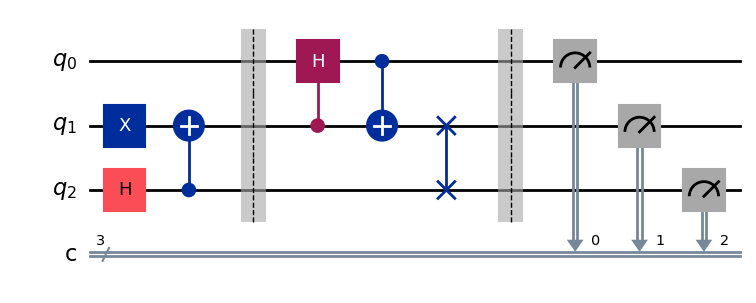

counts {'010': 50017, '001': 25068, '100': 24915}


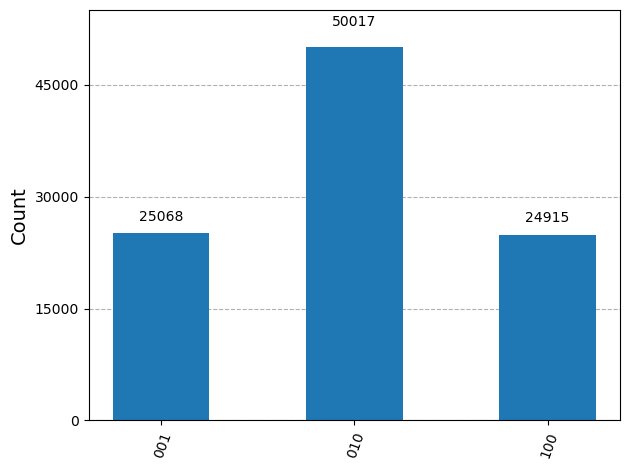

In [18]:
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit,transpile
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit

# n= total rows or levels of Galton Board
# Total no.of qubits = n+1
# Total no.of bins = n+1 

n=2

q=QuantumRegister(n+1,'q')
c=ClassicalRegister(n+1,'c')
qc = QuantumCircuit(q,c)
#################################################################
# n= 1 level

qc.h(q[n])
qc.x(q[n-1]) 
qc.cx(q[n], q[n-1])
qc.barrier()

#################################################################
# start from second last qubit-Upward

if n%2==0:
    for i in range(n-1,0,-1):
        qc.ch(q[i],q[i-1])
        qc.cx(q[i-1] , q[i])
        qc.swap(q[i],q[n])
        for m in range(n-1,i,-1):
            if (i-1)%2 !=0:
                qc.swap(q[m],q[i])
        qc.barrier()

else:
    for i in range(n-1,0,-1):
        qc.ch(q[i],q[i-1])
        qc.cx(q[i-1] , q[i])
        qc.swap(q[i],q[n])
        for m in range(n-1,i,-1):
            if (i)%2 !=0:
                qc.swap(q[m],q[i])
        
        qc.barrier()


    
    
   
    
#################################################################
    
qc.measure(q,c)    

display(qc.draw('mpl'))



from qiskit.providers.basic_provider import BasicSimulator
backend=BasicSimulator()
result=backend.run(qc,shots=100000).result()
counts=result.get_counts()
print('counts',counts)

plot_histogram(counts)